# 0. Imports

In [1]:
!pip install -q gwpy 

import logging
import h5py
import json
import readligo as rl
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os
import numpy as np
from gwosc.locate import get_urls
import requests
import os
from gwosc.locate import get_urls
from scipy import signal

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from rk_visualizer import *
app = RKModelApplication(master=root)
visualizer = RKGraphVisualizer(app)

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


# 1. Read LIGO Strain Data & Load for Analysis

In [2]:
detector = 'H1'
event_data  = {'GW170729': {'t': 1185389807.3},
               'GW170817': {'t': 1187008882.4},
               'GW190521': {'t': 1242442967.4},
               'GW190814': {'t': 1249852257.0}}

for name, event in event_data.items():
    url = get_urls(detector, event['t'], event['t'])[-1]
    fn = os.path.basename(url)
    n = url.split("/")[-3]
    event_data[n]["path"] = fn
    if not os.path.exists(fn): 
        print('Downloading: ' , url)
        with open(fn,'wb') as strainfile: 
            straindata = requests.get(url)
            strainfile.write(straindata.content)
    else:
        print("already downloaded {}. skipping".format(fn))

already downloaded H-H1_GWOSC_4KHZ_R1-1185387760-4096.hdf5. skipping
already downloaded H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5. skipping
already downloaded H-H1_GWOSC_4KHZ_R1-1242440920-4096.hdf5. skipping
already downloaded H-H1_GWOSC_4KHZ_R1-1249850209-4096.hdf5. skipping


# 2. View Strain Data in Time Series

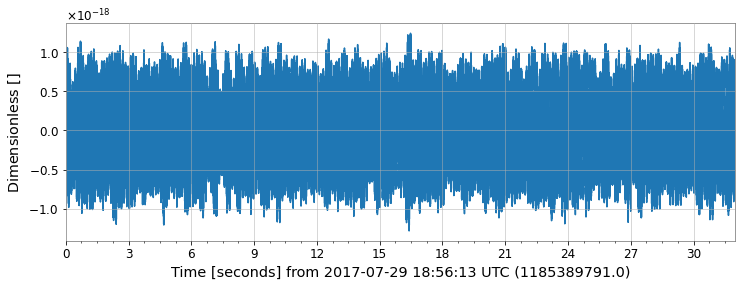

In [6]:
from gwpy.timeseries import TimeSeries
focus_event = 'GW170729'
strain = TimeSeries.read(event_data[focus_event]['path'],format='hdf5.losc')
center = int(event_data['GW170729']['t'])
strain = strain.crop(center-16, center+16)
fig1 = strain.plot()

Trying to find event for 1185389807.3: https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170729/v1/H-H1_GWOSC_4KHZ_R1-1185387760-4096.hdf5
GW170729 is already downloaded
Trying to find event for 1187008882.43: https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170817/v3/H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5
GW170817 is already downloaded
Trying to find event for 1242442967.4: https://www.gw-openscience.org/eventapi/json/GWTC-2.1-confident/GW190521/v4/H-H1_GWOSC_4KHZ_R1-1242440920-4096.hdf5
GW190521 is already downloaded
Trying to find event for 1249852257.0: https://www.gw-openscience.org/eventapi/json/GWTC-2.1-confident/GW190814/v3/H-H1_GWOSC_4KHZ_R1-1249850209-4096.hdf5
GW190814 is already downloaded


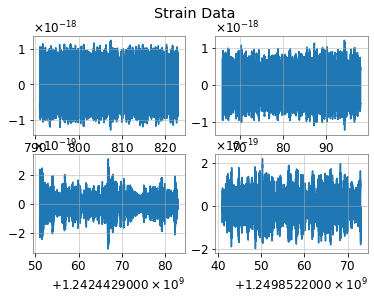

In [8]:
# using the tool
visualizer.load_data()
visualizer.plot_strain()

# 3. Plot ASD of Whitened & Band-Passed Strain

In [ ]:
visualizer.plot_asd()

# -- Whiten and bandpass data
white_data = strain.whiten()
bp_data = white_data.bandpass(30, 400)
fig3 = bp_data.plot()
t = event_data[focus_event]['t']
plt.xlim(t-0.2, t+0.1)
plt.show()

# 4. Plot Multi-event Spectograms 

/opt/conda/lib/python3.8/site-packages/gwpy/plot/axes.py:308: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  return super().pcolormesh(*args, **kwargs)


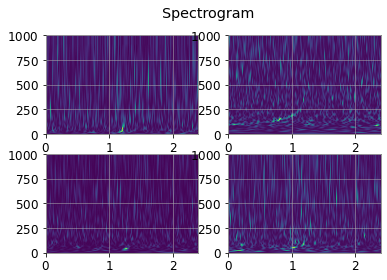

In [11]:
visualizer.plot_spectrograms()

# 5. Merge Events in Frequency & Time Space

In [ ]:
visualizer.plot_eventscape()

# 6. Plot Topological Eventscape in 3D with Projected Eventscape in 2D

# 7. Plot Topological Signatures of Filtered Events in 3D Eventscape

In [ ]:
visualizer.plot_filteredscape()

# 8. Plot Projection of Filtered Events in 2D Projected Space

In [ ]:
visualizer.plot_network()

# 9. Omniview of All Paramenter Estimate from Best Fit Model in Pair Plots

In [ ]:
visualizer.plot_pair_plots()

# 10. Plot Graph hierarchy for independent PE variable Clusters

In [ ]:
visualizer.plot_heirarchy()

# 11. Apply Linkers and Filters to the R-K Model 

# 12 Plot Final R-K Diagrams

In [ ]:
visualizer.plot_rk_diagrams()